In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Charger les données MNIST
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
# Utilise la fonction fetch_openml de scikit-learn pour récupérer le jeu de données MNIST.
# 'mnist_784' est le nom de la base de données sur OpenML contenant les images MNIST 28x28 pixels.
# La version 1 est spécifiée, et les données ne sont pas mises en cache en mémoire (cache=True).
# as_frame=False indique que les données ne seront pas renvoyées sous forme de DataFrame Pandas.

mnist.target = mnist.target.astype(np.int8)
# Convertit le type de données de la cible en entiers 8 bits (pour économiser de l'espace mémoire).

# Mélanger les données
X, y = mnist.data, mnist.target
# X contient les images (caractéristiques), y contient les étiquettes (chiffres de 0 à 9).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Divise les données en ensembles d'entraînement et de test.
# test_size=0.2 spécifie que 20% des données seront utilisées pour l'ensemble de test.
# random_state=42 fixe la graine du générateur aléatoire pour assurer la reproductibilité.

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
# Affiche le nombre de lignes (échantillons) et de colonnes (caractéristiques) de l'ensemble d'entraînement.

print("Dimensions de l'ensemble de test :", X_test.shape)
# Affiche le nombre de lignes (échantillons) et de colonnes (caractéristiques) de l'ensemble de test.



/Users/yuss/Documents/cours_m2/machineLearning/tp2/venv/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Dimensions de l'ensemble d'entraînement : (56000, 784)
Dimensions de l'ensemble de test : (14000, 784)


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# Choisissez le chiffre que vous souhaitez prédire (ici, 5)
chosen_digit = 8

# Créer une nouvelle variable cible binaire pour le chiffre choisi
y_train_binary = (y_train == chosen_digit)
y_test_binary = (y_test == chosen_digit)
# Crée des variables binaires indiquant si chaque élément de y_train ou y_test est égal au chiffre choisi.

""" # Initialiser le classificateur SGD
sgd_clf = SGDClassifier(random_state=42)
# Initialise un classificateur linéaire à descente de gradient stochastique (SGD).

# Entraîner le classificateur sur l'ensemble d'entraînement binaire

sgd_clf.fit(X_train, y_train_binary)
# Entraîne le modèle sur l'ensemble d'entraînement binaire pour prédire si un chiffre est égal au chiffre choisi.

# Tester la prédiction sur une image spécifique (par exemple, l'image à l'indice 24000)
some_digit = X[24000]
# Sélectionne une image spécifique du jeu de données.

# Prédiction du modèle SGD pour l'image spécifique
sgd_prediction = sgd_clf.predict([some_digit])
# Utilise le modèle entraîné pour prédire si l'image spécifique représente le chiffre choisi.
print(f"Prédiction du modèle SGD pour l'image : {sgd_prediction}")
# Affiche la prédiction du modèle. """

# Initialiser le classificateur SGD pour la classification multiclasse
sgd_clf_multiclass = SGDClassifier(random_state=42)
# Initialise un classificateur linéaire à descente de gradient stochastique (SGD) pour la classification multiclasse.

# Entraîner le classificateur sur l'ensemble d'entraînement multiclasse
sgd_clf_multiclass.fit(X_train, y_train)
# Entraîne le modèle sur l'ensemble d'entraînement multiclasse pour prédire le chiffre réel.

# Tester la prédiction sur une image spécifique (par exemple, l'image à l'indice 24000)
some_digit = X[24000]
# Sélectionne une image spécifique du jeu de données.

# Prédiction du modèle SGD pour la classification multiclasse
sgd_prediction_multiclass = sgd_clf_multiclass.predict([some_digit])
# Utilise le modèle entraîné pour prédire le chiffre représenté par l'image spécifique.
print(f"Prédiction du modèle SGD pour l'image : {sgd_prediction_multiclass}")
# Affiche la prédiction du modèle.


Prédiction du modèle SGD pour l'image : [8]


In [3]:
from sklearn.metrics import precision_score, recall_score

# Évaluer les performances du modèle avec les métriques de précision et de rappel
"""
y_test_pred = sgd_clf.predict(X_test)
precision = precision_score(y_test_binary, y_test_pred)
recall = recall_score(y_test_binary, y_test_pred)

# Afficher les résultats
print(f"Précision : {precision}")
print(f"Rappel : {recall}")
"""

# Évaluer les performances du modèle SGD avec les métriques de précision et de rappel
y_test_pred_multiclass_sgd = sgd_clf_multiclass.predict(X_test)
# Utilise le modèle SGD multiclasse entraîné pour prédire les étiquettes sur l'ensemble de test.

precision_sgd = precision_score(
    y_test, y_test_pred_multiclass_sgd, average='weighted')
# Calcule la précision en comparant les étiquettes réelles (y_test) avec les prédictions du modèle.
# average='weighted' indique que la précision sera calculée en tenant compte du poids des différentes classes.

recall_sgd = recall_score(
    y_test, y_test_pred_multiclass_sgd, average='weighted')
# Calcule le rappel en comparant les étiquettes réelles (y_test) avec les prédictions du modèle.
# average='weighted' indique que le rappel sera calculé en tenant compte du poids des différentes classes.

print("\nPerformances du modèle SGD (Classification Multiclasse) :")
print(f"Précision : {precision_sgd}")
# Affiche la précision du modèle pour la classification multiclasse.

print(f"Rappel : {recall_sgd}")
# Affiche le rappel du modèle pour la classification multiclasse.




Performances du modèle SGD (Classification Multiclasse) :
Précision : 0.880363811463317
Rappel : 0.8717142857142857


In [4]:
from sklearn.ensemble import RandomForestClassifier

"""
# Initialiser le classificateur RandomForest
rf_clf = RandomForestClassifier(random_state=42)

# Entraîner le classificateur RandomForest sur l'ensemble d'entraînement binaire
rf_clf.fit(X_train, y_train_binary)

# Prédiction du modèle RandomForest
rf_prediction = rf_clf.predict([some_digit])
print(f"Prédiction du modèle RandomForest pour l'image : {rf_prediction}")
"""
# Commentaires en mode commentaire multiligne pour désactiver l'exécution.

# Initialiser le classificateur RandomForest pour la classification multiclasse
rf_clf_multiclass = RandomForestClassifier(random_state=42)
# Initialise un classificateur de forêt aléatoire pour la classification multiclasse.

# Entraîner le classificateur RandomForest sur l'ensemble d'entraînement multiclasse
rf_clf_multiclass.fit(X_train, y_train)
# Entraîne le modèle sur l'ensemble d'entraînement multiclasse pour prédire le chiffre réel.

# Prédiction du modèle RandomForest pour la classification multiclasse
rf_prediction_multiclass = rf_clf_multiclass.predict([some_digit])
# Utilise le modèle entraîné pour prédire le chiffre représenté par l'image spécifique.
print(
    f"Prédiction du modèle RandomForest pour l'image : {rf_prediction_multiclass}")

# Évaluer les performances du modèle RandomForest avec les métriques de précision et de rappel
y_test_pred_multiclass_rf = rf_clf_multiclass.predict(X_test)
# Utilise le modèle RandomForest multiclasse entraîné pour prédire les étiquettes sur l'ensemble de test.

precision_rf = precision_score(
    y_test, y_test_pred_multiclass_rf, average='weighted')
# Calcule la précision en comparant les étiquettes réelles (y_test) avec les prédictions du modèle.
# average='weighted' indique que la précision sera calculée en tenant compte du poids des différentes classes.

recall_rf = recall_score(y_test, y_test_pred_multiclass_rf, average='weighted')
# Calcule le rappel en comparant les étiquettes réelles (y_test) avec les prédictions du modèle.
# average='weighted' indique que le rappel sera calculé en tenant compte du poids des différentes classes.

print("\nPerformances du modèle RandomForest (Classification Multiclasse) :")
print(f"Précision : {precision_rf}")
# Affiche la précision du modèle pour la classification multiclasse.

print(f"Rappel : {recall_rf}")
# Affiche le rappel du modèle pour la classification multiclasse.


Prédiction du modèle RandomForest pour l'image : [8]

Performances du modèle RandomForest (Classification Multiclasse) :
Précision : 0.9672867515335132
Rappel : 0.9672857142857143


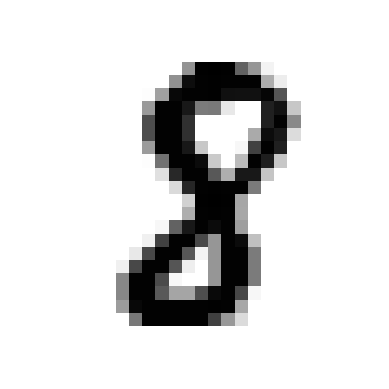

In [5]:
some_digit_image = some_digit.reshape(28, 28)
# Redimensionne l'image à plat (vecteur de longueur 784) en une matrice 28x28 pour la visualisation.

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
# Affiche l'image en utilisant la fonction imshow de Matplotlib.
# cmap=mpl.cm.binary indique que la colormap utilisée sera en noir et blanc.
# interpolation="nearest" spécifie la méthode d'interpolation pour afficher l'image.

plt.axis("off")
# Désactive l'affichage des axes (pas de graduations).

plt.show()
# Affiche l'image.


In [6]:
""" # Évaluer les performances du modèle SGD avec les métriques de précision et de rappel
sgd_precision = precision_score(y_test_binary, sgd_clf.predict(X_test))
sgd_recall = recall_score(y_test_binary, sgd_clf.predict(X_test))

# Évaluer les performances du modèle RandomForest avec les métriques de précision et de rappel
rf_precision = precision_score(y_test_binary, rf_clf.predict(X_test))
rf_recall = recall_score(y_test_binary, rf_clf.predict(X_test))

# Afficher les résultats
print("\nPerformances du modèle SGD :")
print(f"Précision : {sgd_precision}")
print(f"Rappel : {sgd_recall}")

print("\nPerformances du modèle RandomForest :")
print(f"Précision : {rf_precision}")
print(f"Rappel : {rf_recall}")
 """

' # Évaluer les performances du modèle SGD avec les métriques de précision et de rappel\nsgd_precision = precision_score(y_test_binary, sgd_clf.predict(X_test))\nsgd_recall = recall_score(y_test_binary, sgd_clf.predict(X_test))\n\n# Évaluer les performances du modèle RandomForest avec les métriques de précision et de rappel\nrf_precision = precision_score(y_test_binary, rf_clf.predict(X_test))\nrf_recall = recall_score(y_test_binary, rf_clf.predict(X_test))\n\n# Afficher les résultats\nprint("\nPerformances du modèle SGD :")\nprint(f"Précision : {sgd_precision}")\nprint(f"Rappel : {sgd_recall}")\n\nprint("\nPerformances du modèle RandomForest :")\nprint(f"Précision : {rf_precision}")\nprint(f"Rappel : {rf_recall}")\n '